In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all" 
# Permite mostrar el resultado de cada linea de la misma celda

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import keras

from matplotlib import colors
 
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, roc_curve, roc_auc_score, precision_score, r2_score, recall_score, f1_score, cohen_kappa_score
from sklearn.feature_selection import SelectKBest, SelectFpr
from sklearn.preprocessing import scale, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression, ElasticNet
from scipy.stats import randint

from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD, RMSprop

Using TensorFlow backend.


## Ejemplo completo

### classification Wine Types: Red or White?

In [3]:
white=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
white.head()
white.shape

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


(4898, 12)

In [4]:
red= pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
red.head()
red.shape

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(1599, 12)

In [5]:
white.info()
print('__________________________________________________')
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
D

In [6]:
# Take a sample of 5 rows of `red`
red.sample(5)

# Describe `white`
white.describe()

# Double check for null values 
pd.isnull(red).sum()
pd.isnull(white).sum()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
915,8.6,0.315,0.40,2.2,0.079,3.0,6.0,0.99512,3.27,0.67,11.9,6
396,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
1067,11.1,0.310,0.53,2.2,0.060,3.0,10.0,0.99572,3.02,0.83,10.9,7
1070,9.3,0.330,0.45,1.5,0.057,19.0,37.0,0.99498,3.18,0.89,11.1,7
1455,6.5,0.900,0.00,1.6,0.052,9.0,17.0,0.99467,3.50,0.63,10.9,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

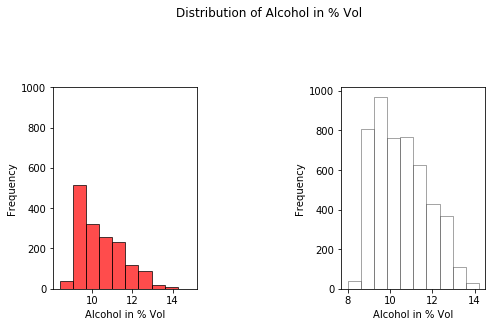

In [7]:
fig, ax = plt.subplots(1, 2)

_=ax[0].hist(red.alcohol, 10, facecolor='red', ec="black", alpha=0.7, label="Red wine")
_=ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.7, label="White wine")

_=fig.subplots_adjust(left=0, right=1, bottom=0, top=0.7, hspace=0.05, wspace=1)
_=ax[0].set_ylim([0, 1000])
_=ax[0].set_xlabel("Alcohol in % Vol")
_=ax[0].set_ylabel("Frequency")
_=ax[1].set_xlabel("Alcohol in % Vol")
_=ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best')
#ax[1].legend(loc='best')
_=fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

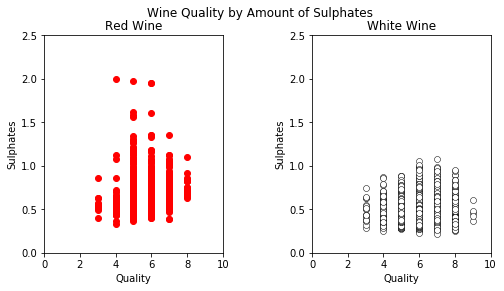

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

_=ax[0].scatter(red['quality'], red["sulphates"], color="red")
_=ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

_=ax[0].set_title("Red Wine")
_=ax[1].set_title("White Wine")
_=ax[0].set_xlabel("Quality")
_=ax[1].set_xlabel("Quality")
_=ax[0].set_ylabel("Sulphates")
_=ax[1].set_ylabel("Sulphates")
_=ax[0].set_xlim([0,10])
_=ax[1].set_xlim([0,10])
_=ax[0].set_ylim([0,2.5])
_=ax[1].set_ylim([0,2.5])
_=fig.subplots_adjust(wspace=0.5)
_=fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

In [10]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)
wines.sample(10)

print('Observations per class: \n', wines['type'].value_counts())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1069,8.0,0.62,0.35,2.8,0.086,28.0,52.0,0.99700,3.31,0.62,10.8,5,1
6274,5.7,0.21,0.37,4.5,0.040,58.0,140.0,0.99332,3.29,0.62,10.6,6,0
5726,6.7,0.31,0.34,6.8,0.059,51.0,215.0,0.99538,3.33,0.56,10.3,5,0
2028,7.1,0.31,0.47,13.6,0.056,54.0,197.0,0.99780,3.10,0.49,9.3,5,0
3260,6.7,0.26,0.49,8.3,0.047,54.0,191.0,0.99540,3.23,0.40,10.3,6,0
3365,6.6,0.32,0.26,7.7,0.054,56.0,209.0,0.99610,3.17,0.45,8.8,5,0
1116,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,6,1
3460,7.8,0.20,0.28,10.2,0.054,78.0,186.0,0.99700,3.14,0.46,10.0,6,0
3215,6.9,0.34,0.49,7.3,0.045,61.0,206.0,0.99570,3.09,0.40,9.0,6,0
3389,9.4,0.16,0.30,1.4,0.042,26.0,176.0,0.99540,3.15,0.46,9.1,5,0


Observations per class: 
 0    4898
1    1599
Name: type, dtype: int64


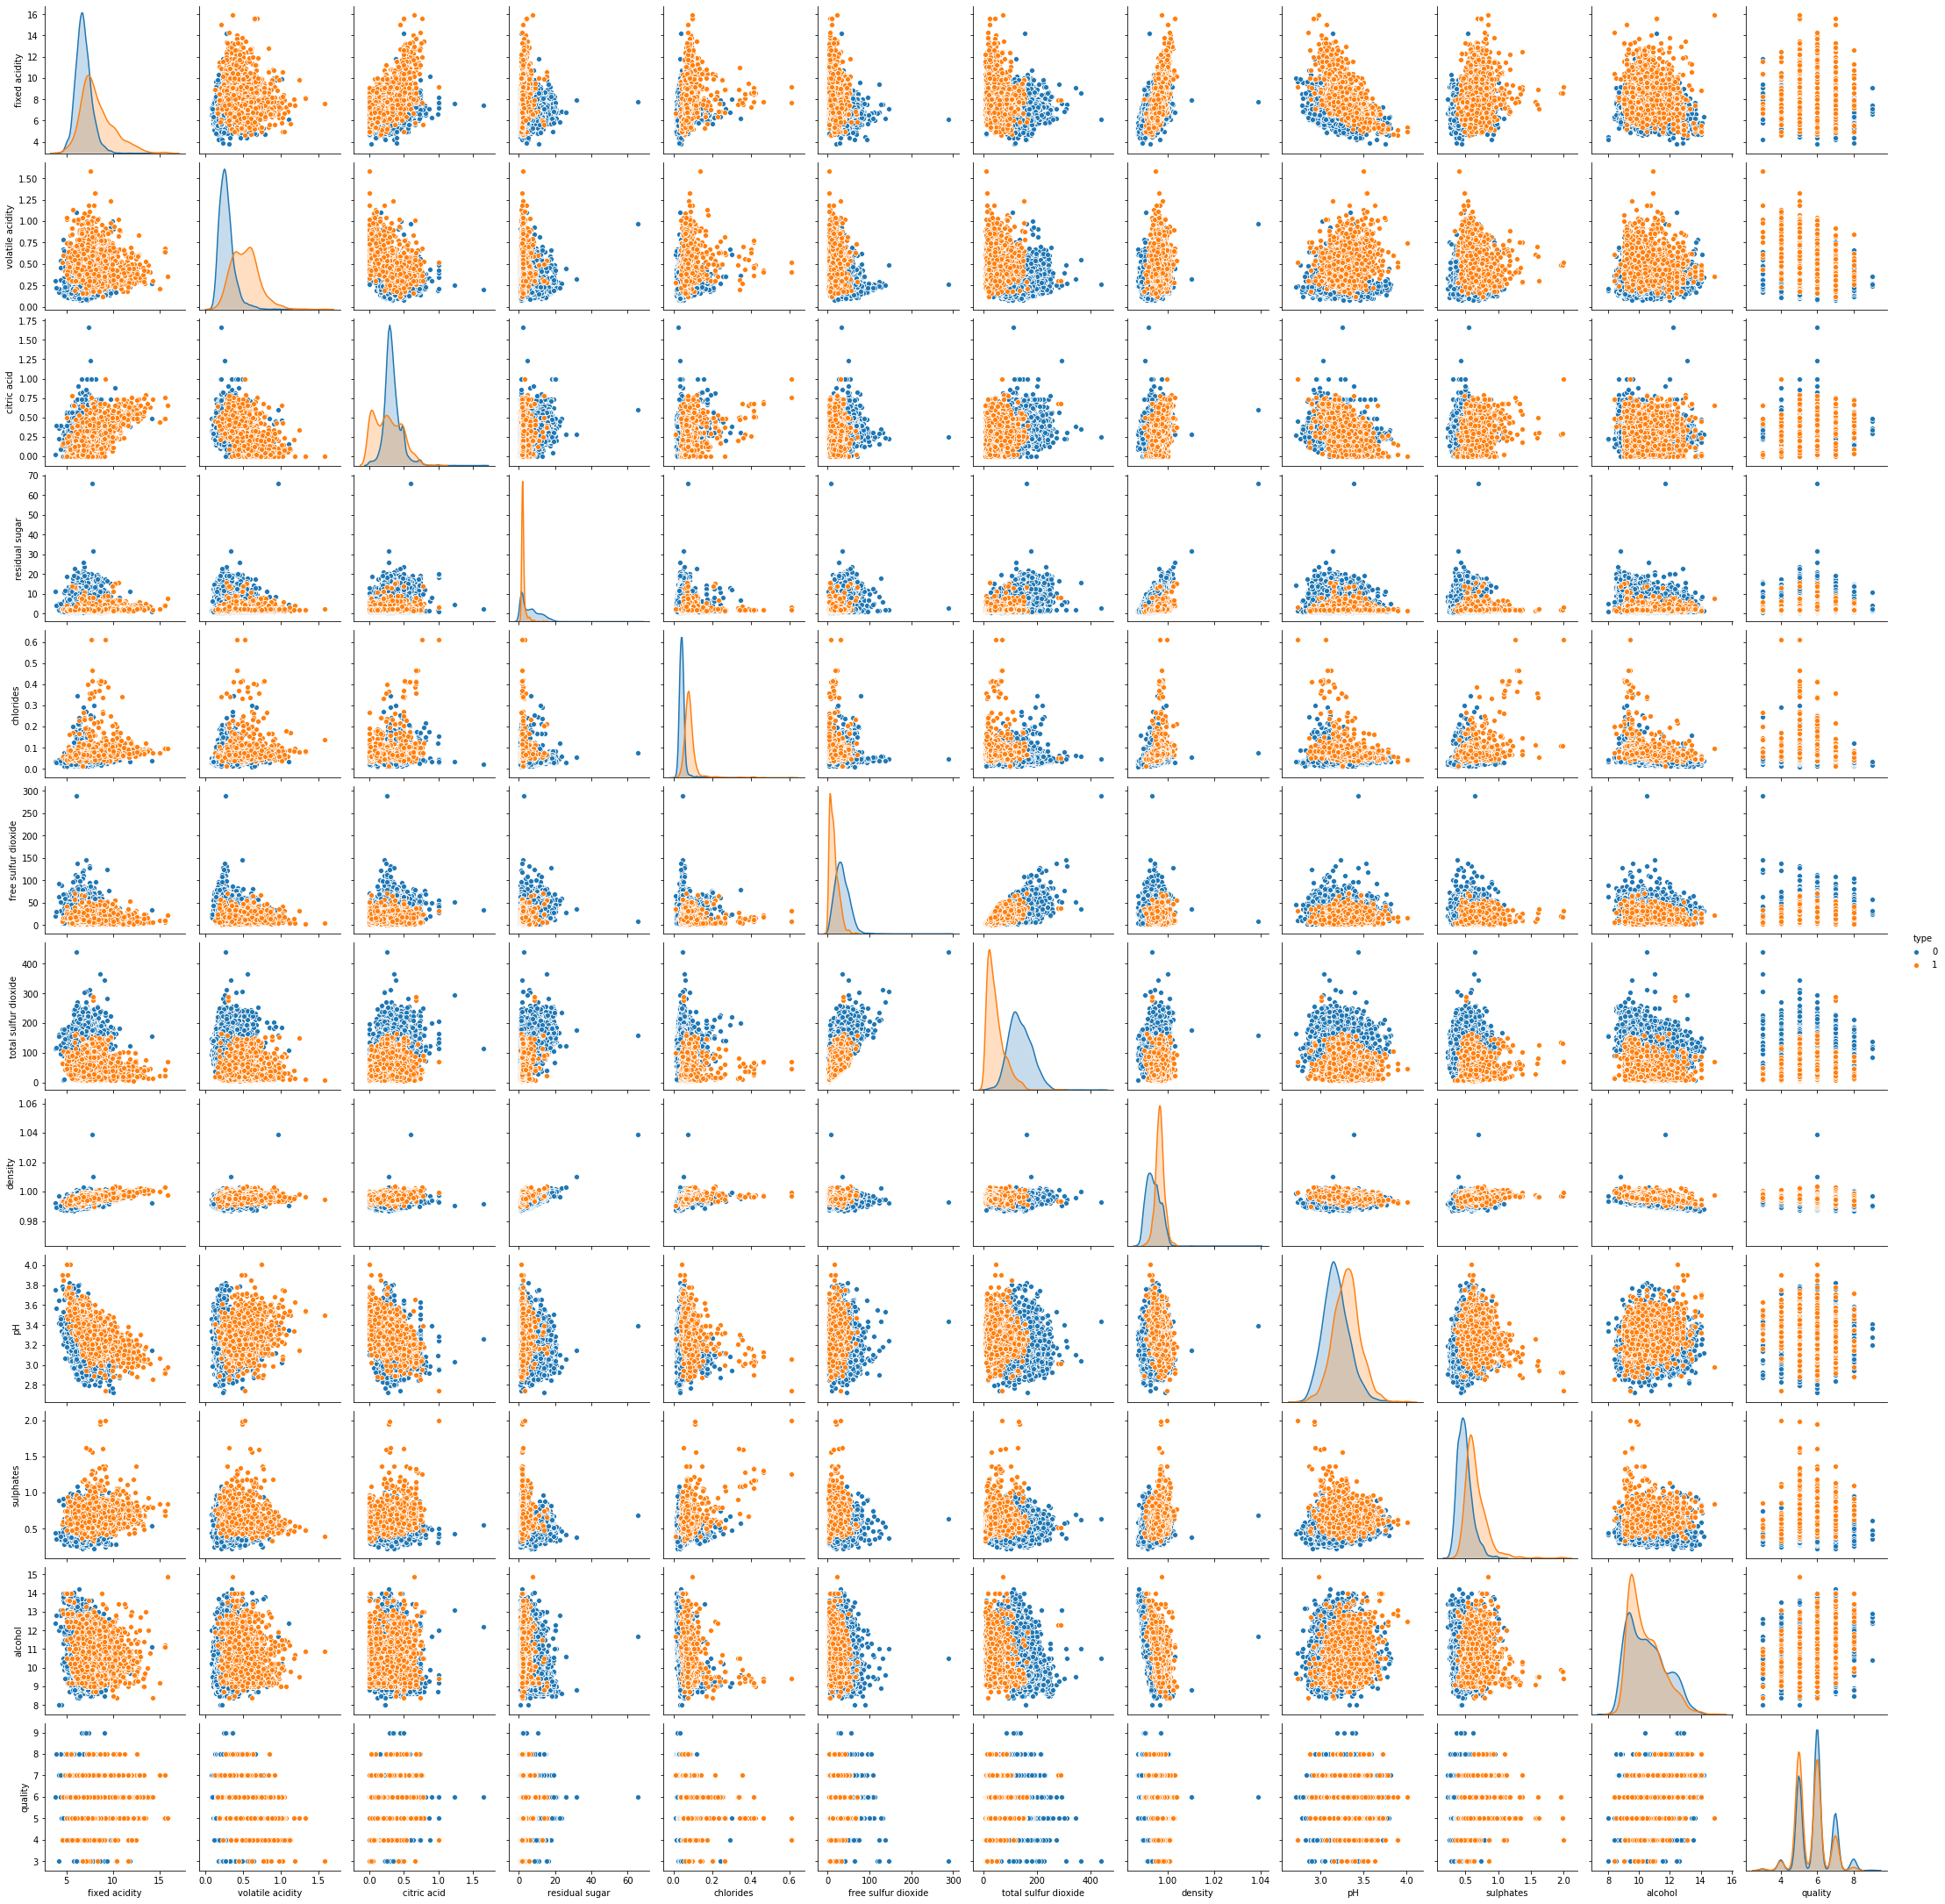

In [11]:
sns.pairplot(wines, hue='type') 

# Show the plot
_=plt.show()

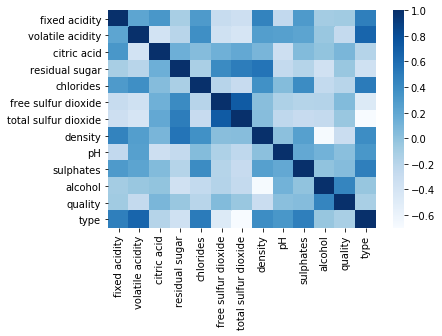

In [12]:
import seaborn as sns
corr = wines.corr()
_=sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap="Blues")


In [13]:
X = wines.drop('type', axis=1).values   #predictors
y = wines['type'].values                #target o label

X.shape
y.shape

(6497, 12)

(6497,)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train[:3]
X_test[:3]

y_train[:5]
y_test[:5]

array([[7.1000e+00, 1.2000e-01, 3.2000e-01, 9.6000e+00, 5.4000e-02,
        6.4000e+01, 1.6200e+02, 9.9620e-01, 3.4000e+00, 4.1000e-01,
        9.4000e+00, 5.0000e+00],
       [6.8000e+00, 1.2000e-01, 3.0000e-01, 1.2900e+01, 4.9000e-02,
        3.2000e+01, 8.8000e+01, 9.9654e-01, 3.2000e+00, 3.5000e-01,
        9.9000e+00, 6.0000e+00],
       [7.7000e+00, 3.8000e-01, 4.0000e-01, 2.0000e+00, 3.8000e-02,
        2.8000e+01, 1.5200e+02, 9.9060e-01, 3.1800e+00, 3.2000e-01,
        1.2900e+01, 6.0000e+00]])

array([[7.0000e+00, 1.7000e-01, 7.4000e-01, 1.2800e+01, 4.5000e-02,
        2.4000e+01, 1.2600e+02, 9.9420e-01, 3.2600e+00, 3.8000e-01,
        1.2200e+01, 8.0000e+00],
       [7.7000e+00, 6.4000e-01, 2.1000e-01, 2.2000e+00, 7.7000e-02,
        3.2000e+01, 1.3300e+02, 9.9560e-01, 3.2700e+00, 4.5000e-01,
        9.9000e+00, 5.0000e+00],
       [6.8000e+00, 3.9000e-01, 3.4000e-01, 7.4000e+00, 2.0000e-02,
        3.8000e+01, 1.3300e+02, 9.9212e-01, 3.1800e+00, 4.4000e-01,
        1.2000e+01, 7.0000e+00]])

array([0, 0, 0, 1, 0], dtype=int64)

array([0, 1, 0, 0, 0], dtype=int64)

In [15]:
#Standardization is a way to deal with these values that lie so far apart. 
#The scikit-learn package offers you a great and quick way of getting your data standardized

from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)
X_train.shape

# Scale the test set
X_test = scaler.transform(X_test)

(4352, 12)

##### Model

Since you only have two classes, namely white and red, you’re going to do a binary classification.

In [16]:
# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(12,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Model output shape
model.output_shape

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

(None, 1)

{'name': 'sequential_1',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'batch_input_shape': (None, 12),
    'dtype': 'float32',
    'units': 12,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'

[array([[ 0.453449  ,  0.0030309 , -0.08889019,  0.12869501, -0.07101619,
          0.11678243,  0.3344741 ,  0.35172403, -0.18250024,  0.32606936,
          0.33135247, -0.08016241],
        [ 0.44114923, -0.26384604,  0.3589307 ,  0.26258528,  0.05830872,
          0.17589533, -0.25726438, -0.18259871,  0.44459546,  0.27170193,
          0.02988327,  0.15309918],
        [ 0.38297427, -0.3965894 ,  0.45797443, -0.11690438, -0.22668064,
         -0.31804943, -0.44178057, -0.403108  , -0.3636731 ,  0.48783636,
         -0.49936366, -0.31649137],
        [ 0.16873705, -0.34543455,  0.03028095,  0.12401688,  0.06897354,
          0.35569453,  0.24500799, -0.4996103 ,  0.25583792, -0.32914555,
          0.06767166, -0.3921337 ],
        [ 0.4511503 , -0.23033118,  0.25744712,  0.34577513,  0.16784954,
         -0.31456184, -0.06538796, -0.01058161,  0.47968698,  0.48785663,
         -0.38055992, -0.43669808],
        [-0.37456083, -0.2461139 , -0.1247915 , -0.2682985 ,  0.12101793,
      

In [19]:
#Batch Gradient Descent. Batch Size = Size of Training Set
#Stochastic Gradient Descent. Batch Size = 1
#Mini-Batch Gradient Descent. 1 < Batch Size < Size of Training Set. In this case, popular batch sizes include 32, 64, and 128 samples

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
                   
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=0)

In [20]:
y_pred = model.predict(X_test).round()

In [21]:
y_pred[:5]
y_test[:5]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

array([0, 1, 0, 0, 0], dtype=int64)

In [22]:
score = model.evaluate(X_test, y_test,verbose=1)
score     #(loss accuracy)

2145/2145 [==============================] - 0s 145us/step


[0.031475320619531386, 0.9939393997192383]

In [23]:
#The confusion matrix, which is a breakdown of predictions into a table showing correct predictions 
# and the types of incorrect predictions made. Ideally, you will only see numbers in the diagonal, 
#which means that all your predictions were correct!

confusion_matrix(y_test, y_pred)

array([[1585,    3],
       [  10,  547]], dtype=int64)

In [24]:
#Precision is a measure of a classifier’s exactness. The higher the precision, the more accurate the classifier.
precision_score(y_test, y_pred)

0.9945454545454545

In [27]:
#Recall is a measure of a classifier’s completeness. The higher the recall, the more cases the classifier covers.
recall_score(y_test, y_pred)

0.9874326750448833

In [28]:
#The F1 Score or F-score is a weighted average of precision and recall.
f1_score(y_test,y_pred)

0.9892086330935251

In [29]:
#The Kappa or Cohen’s kappa is the classification accuracy normalized by the imbalance of the classes in the data.
cohen_kappa_score(y_test, y_pred)

0.985432689858911

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1588
           1       1.00      0.98      0.99       557

    accuracy                           1.00      2145
   macro avg       1.00      0.99      0.99      2145
weighted avg       1.00      1.00      1.00      2145



### Predicting Wine Quality

The quality variable is now the target task in order to predict

you will now need to isolate the quality labels from the rest of the data set. You will put wines.quality in a different variable y and you’ll put the wines data, with exception of the quality column in a variable x

In [26]:
# Isolate target labels
y = wines.quality

# Isolate data
X = wines.drop('quality', axis=1) 

In [27]:
# Scale the data with `StandardScaler`
X = StandardScaler().fit_transform(X)

In [28]:
seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, y):
    model = Sequential()
    model.add(Dense(64, input_dim=12, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model.fit(X[train], y[train], epochs=10, verbose=1)

Epoch 1/10
5197/5197 [==============================] - 2s 330us/step - loss: 14.2020 - mae: 3.3377
Epoch 2/10
5197/5197 [==============================] - 0s 52us/step - loss: 1.6307 - mae: 0.9925
Epoch 3/10
5197/5197 [==============================] - 0s 26us/step - loss: 1.0025 - mae: 0.7726
Epoch 4/10
5197/5197 [==============================] - 0s 23us/step - loss: 0.7533 - mae: 0.6652
Epoch 5/10
5197/5197 [==============================] - 0s 23us/step - loss: 0.6379 - mae: 0.6127
Epoch 6/10
5197/5197 [==============================] - 0s 23us/step - loss: 0.5769 - mae: 0.5842
Epoch 7/10
5197/5197 [==============================] - 0s 23us/step - loss: 0.5417 - mae: 0.5694
Epoch 8/10
5197/5197 [==============================] - 0s 23us/step - loss: 0.5246 - mae: 0.5608
Epoch 9/10
5197/5197 [==============================] - 0s 23us/step - loss: 0.5122 - mae: 0.5540
Epoch 10/10
5197/5197 [==============================] - 0s 23us/step - loss: 0.5025 - mae: 0.5489


Epoch 1/10
5197/5197 [==============================] - 0s 32us/step - loss: 12.4156 - mae: 3.0863
Epoch 2/10
5197/5197 [==============================] - 0s 23us/step - loss: 1.4506 - mae: 0.9421
Epoch 3/10
5197/5197 [==============================] - 0s 23us/step - loss: 0.9155 - mae: 0.7458
Epoch 4/10
5197/5197 [==============================] - 0s 22us/step - loss: 0.7173 - mae: 0.6574
Epoch 5/10
5197/5197 [==============================] - 0s 23us/step - loss: 0.6150 - mae: 0.6088
Epoch 6/10
5197/5197 [==============================] - 0s 22us/step - loss: 0.5619 - mae: 0.5832
Epoch 7/10
5197/5197 [==============================] - 0s 23us/step - loss: 0.5331 - mae: 0.5691
Epoch 8/10
5197/5197 [==============================] - 0s 23us/step - loss: 0.5155 - mae: 0.5592
Epoch 9/10
5197/5197 [==============================] - 0s 22us/step - loss: 0.5032 - mae: 0.5516
Epoch 10/10
5197/5197 [==============================] - 0s 22us/step - loss: 0.4930 - mae: 0.5465


Epoch 1/10
5198/5198 [==============================] - 0s 32us/step - loss: 13.1543 - mae: 3.1930
Epoch 2/10
5198/5198 [==============================] - 0s 22us/step - loss: 1.6096 - mae: 0.9720
Epoch 3/10
5198/5198 [==============================] - 0s 22us/step - loss: 0.9602 - mae: 0.7542
Epoch 4/10
5198/5198 [==============================] - 0s 23us/step - loss: 0.7258 - mae: 0.6555
Epoch 5/10
5198/5198 [==============================] - 0s 23us/step - loss: 0.6153 - mae: 0.6062
Epoch 6/10
5198/5198 [==============================] - 0s 23us/step - loss: 0.5587 - mae: 0.5786
Epoch 7/10
5198/5198 [==============================] - 0s 24us/step - loss: 0.5240 - mae: 0.5603
Epoch 8/10
5198/5198 [==============================] - 0s 26us/step - loss: 0.5078 - mae: 0.5530
Epoch 9/10
5198/5198 [==============================] - 0s 23us/step - loss: 0.4951 - mae: 0.5461
Epoch 10/10
5198/5198 [==============================] - 0s 23us/step - loss: 0.4875 - mae: 0.5423


Epoch 1/10
5198/5198 [==============================] - 0s 32us/step - loss: 13.1216 - mae: 3.1765
Epoch 2/10
5198/5198 [==============================] - 0s 24us/step - loss: 1.5904 - mae: 0.9745
Epoch 3/10
5198/5198 [==============================] - 0s 25us/step - loss: 1.0102 - mae: 0.7780
Epoch 4/10
5198/5198 [==============================] - 0s 25us/step - loss: 0.7579 - mae: 0.6680
Epoch 5/10
5198/5198 [==============================] - 0s 23us/step - loss: 0.6427 - mae: 0.6135
Epoch 6/10
5198/5198 [==============================] - 0s 22us/step - loss: 0.5826 - mae: 0.5845
Epoch 7/10
5198/5198 [==============================] - 0s 23us/step - loss: 0.5447 - mae: 0.5681
Epoch 8/10
5198/5198 [==============================] - 0s 25us/step - loss: 0.5220 - mae: 0.5575
Epoch 9/10
5198/5198 [==============================] - 0s 24us/step - loss: 0.5058 - mae: 0.5489
Epoch 10/10
5198/5198 [==============================] - 0s 23us/step - loss: 0.4982 - mae: 0.5462


Epoch 1/10
5198/5198 [==============================] - 0s 35us/step - loss: 11.8501 - mae: 2.9634
Epoch 2/10
5198/5198 [==============================] - 0s 24us/step - loss: 1.5908 - mae: 0.9810
Epoch 3/10
5198/5198 [==============================] - 0s 23us/step - loss: 1.0151 - mae: 0.7801: 0s - loss: 1.0405 - mae: 0.787
Epoch 4/10
5198/5198 [==============================] - 0s 24us/step - loss: 0.7618 - mae: 0.6709
Epoch 5/10
5198/5198 [==============================] - 0s 23us/step - loss: 0.6441 - mae: 0.6147
Epoch 6/10
5198/5198 [==============================] - 0s 23us/step - loss: 0.5842 - mae: 0.5896
Epoch 7/10
5198/5198 [==============================] - 0s 23us/step - loss: 0.5462 - mae: 0.5702
Epoch 8/10
5198/5198 [==============================] - 0s 23us/step - loss: 0.5231 - mae: 0.5591
Epoch 9/10
5198/5198 [==============================] - 0s 23us/step - loss: 0.5077 - mae: 0.5530
Epoch 10/10
5198/5198 [==============================] - 0s 25us/step - loss: 0.4972 

In [33]:
y_pred = model.predict(X[test])
y_pred[:5]
y[train[:5]]

array([[5.7931304],
       [5.431591 ],
       [4.755675 ],
       [5.8448443],
       [5.879875 ]], dtype=float32)

0    5
1    5
2    5
4    5
5    5
Name: quality, dtype: int64

you can make use of the Mean Squared Error (MSE) and the Mean Absolute Error (MAE). The former, which is also called the “mean squared deviation” (MSD) measures the average of the squares of the errors or deviations. In other words, it quantifies the difference between the estimator and what is estimated. This way, you get to know some more about the quality of your estimator: it is always non-negative, and values closer to zero are better.

The latter evaluation measure, MAE, stands for Mean Absolute Error: it quantifies how close predictions are to the eventual outcomes.

In [34]:
mse_value, mae_value = model.evaluate(X[test], y[test], verbose=0)

print(mse_value)

0.5097034745394403


In [35]:
print(mae_value)

0.5504786968231201


In [36]:
#R^2 (coefficient of determination) regression score function.

#Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 
#A constant model that always predicts the expected value of y, disregarding the input features, 
#would get a R^2 score of 0.0.

r2_score(y[test], y_pred)

0.33245306073532443

In [ ]:
seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, y):
    model = Sequential()
    model.add(Dense(64, input_dim=12, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model.fit(X[train], y[train], epochs=10, verbose=1)

In [ ]:
y_pred = model.predict(X[test])

In [ ]:
r2_score(y[test], y_pred)

In [ ]:
seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, y):
    model = Sequential()
    model.add(Dense(128, input_dim=12, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1))
    sgd=SGD(lr=0.01)
    model.compile(optimizer=sgd, loss='mse', metrics=['mae'])
    model.fit(X[train], y[train], epochs=30, verbose=1)

In [ ]:
y_pred = model.predict(X[test])

In [ ]:
r2_score(y[test], y_pred)

In [ ]:
seed = 7
np.random.seed(seed)

#kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
#for train, test in kfold.split(X, y):

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = Sequential()
model.add(Dense(32, input_dim=12, activation='relu'))
    #model.add(Dense(32, activation='relu'))
model.add(Dense(1))
rmsprop = RMSprop(lr=0.1)
model.compile(optimizer=rmsprop, loss='mse', metrics=['mae'])
model.fit(X[train], y[train], epochs=20, verbose=1)

In [ ]:
y_pred = model.predict(X[test])

In [37]:
r2_score(y[test], y_pred)

0.33245306073532443